In [6]:
import numpy as np
import scipy
from matplotlib import pylab as plt
from scipy.signal import find_peaks
%matplotlib inline

In [14]:
def open_file(name_of_file): 
    values = []
    time = []
    with open(name_of_file) as file:
        for line in file:
            line = line.split(',')
            value = int(line[1])
            values.append(value)
            time.append(line[0])
    return values

def plot(values):
    x = np.arange(0, 100)
    y = np.array(values[:100])
    plt.plot(x, y)
    plt.show()
    
def Filter(values):
    filter_ = []
    for j in range(len(values)):
    # а если j==0?  #туда записывается среднее от [-1]-(крайний элемент массива), [0] и [1] (или это не правильно?)
        if j == len(values) - 1:
            filter_.append((values[j - 1] + values[0] + values[j])/3)
        else:
            filter_.append((values[j - 1] + values[j + 1] + values[j])/3)
    return filter_

def peak_detection(filter_):
    peaks = scipy.signal.find_peaks(filter_, height = [515, 700])
    peakss = np.array(peaks[1]['peak_heights'])
    return peakss

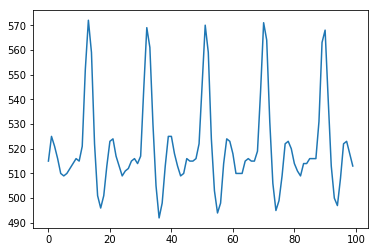

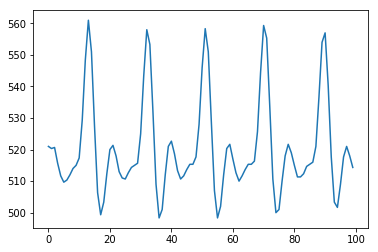

array([520.66666667, 561.        , 521.33333333, 558.        ,
       522.66666667, 558.33333333, 521.66666667, 559.33333333,
       521.66666667, 557.        , 521.        , 558.        ,
       522.        , 559.        , 520.66666667, 558.        ,
       520.66666667, 555.        , 521.66666667, 560.        ,
       519.66666667, 516.33333333, 559.66666667, 520.        ,
       516.33333333, 559.33333333, 520.33333333, 516.33333333,
       560.        , 521.33333333, 516.33333333, 564.66666667,
       521.33333333, 515.66666667, 560.66666667, 522.66666667,
       558.        , 522.66666667, 561.66666667, 521.33333333,
       563.33333333, 522.33333333, 559.        , 523.        ,
       557.33333333, 521.66666667, 561.66666667, 520.66666667,
       561.66666667, 521.66666667, 559.66666667, 522.        ,
       556.66666667, 522.33333333, 557.66666667, 522.66666667,
       561.66666667, 521.66666667, 560.        , 522.        ,
       557.66666667, 523.66666667, 556.        , 522.66

In [19]:
values_1 = open_file("Contact.txt")

plot(values_1)

filtered_values_1 = Filter(values_1)

plot(filtered_values_1)

peak_detection(filtered_values_1)

In [ ]:
#general comments:
# 1. Make functions(like Plot(x,y), filter(x,y) and etc.). Put them in ONE cell in the beginning.Call them.
# DRY(dont repeat yourself).
# 2. All import in one cell in the very beginning of the file
# 3. Try to plot peaks and graphs on the same figure(graph as lines and peaks as dots). Lets check how the 
# find_peaks_cwt fucntion works.